# decision trees and random forests

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import dtreeviz
from sklearn.tree import export_graphviz
import seaborn as sns
import graphviz
from sklearn.tree import plot_tree

In [2]:
df=pd.read_csv('heart_disease.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
df.shape

(1025, 14)

In [16]:
X=df.iloc[::,0:13]

In [18]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [20]:
X.shape

(1025, 13)

In [22]:
y=df.iloc[::,-1]

In [24]:
y.shape

(1025,)

In [26]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
y_train.shape

(820,)

In [32]:
X_train.shape

(820, 13)

In [34]:
dt_clf=DecisionTreeClassifier(max_depth=4,random_state=42)

In [36]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [38]:
y_pred_dt=dt_clf.predict(X_test)

decison tree accuracy
 0.8536585365853658
decision tree classification report
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.85      0.85      0.85       100

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205

decision tree confusion matrix
 [[90 15]
 [15 85]]


<function matplotlib.pyplot.show(close=None, block=None)>

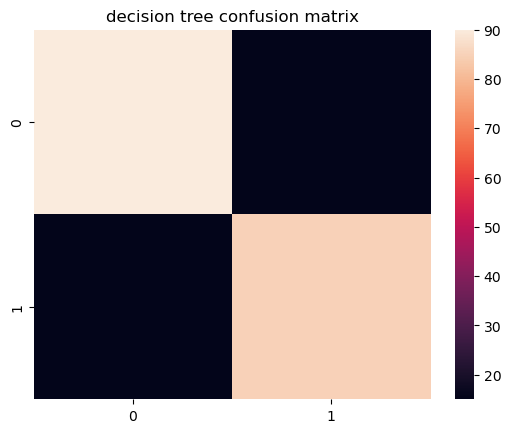

In [40]:
# accuracy and confusion matrix
print('decison tree accuracy\n', accuracy_score(y_test,y_pred_dt))
print('decision tree classification report\n',classification_report(y_test,y_pred_dt))
print('decision tree confusion matrix\n',confusion_matrix(y_test,y_pred_dt) )
sns.heatmap(confusion_matrix(y_test,y_pred_dt))
plt.title('decision tree confusion matrix')
plt.show

In [53]:
# visualizing decision tree

# viz=dtreeviz.dtreeviz(dt_clf,X_train,y_train,target_name='Heart disease',feature_names=X.columns.tolist(),class_names={0:"No disease",1:"Disease"})
# viz.show()

In [51]:
# dot_data = export_graphviz(dt_clf, out_file=None,
#                            feature_names=X.columns,
                          
#                            filled=True, rounded=True,
#                            special_characters=True)
# graph = graphviz.Source(dot_data)
# graph.render("decision_tree")
# graph.view('decision tree')# Saves as decision_tree.pdf

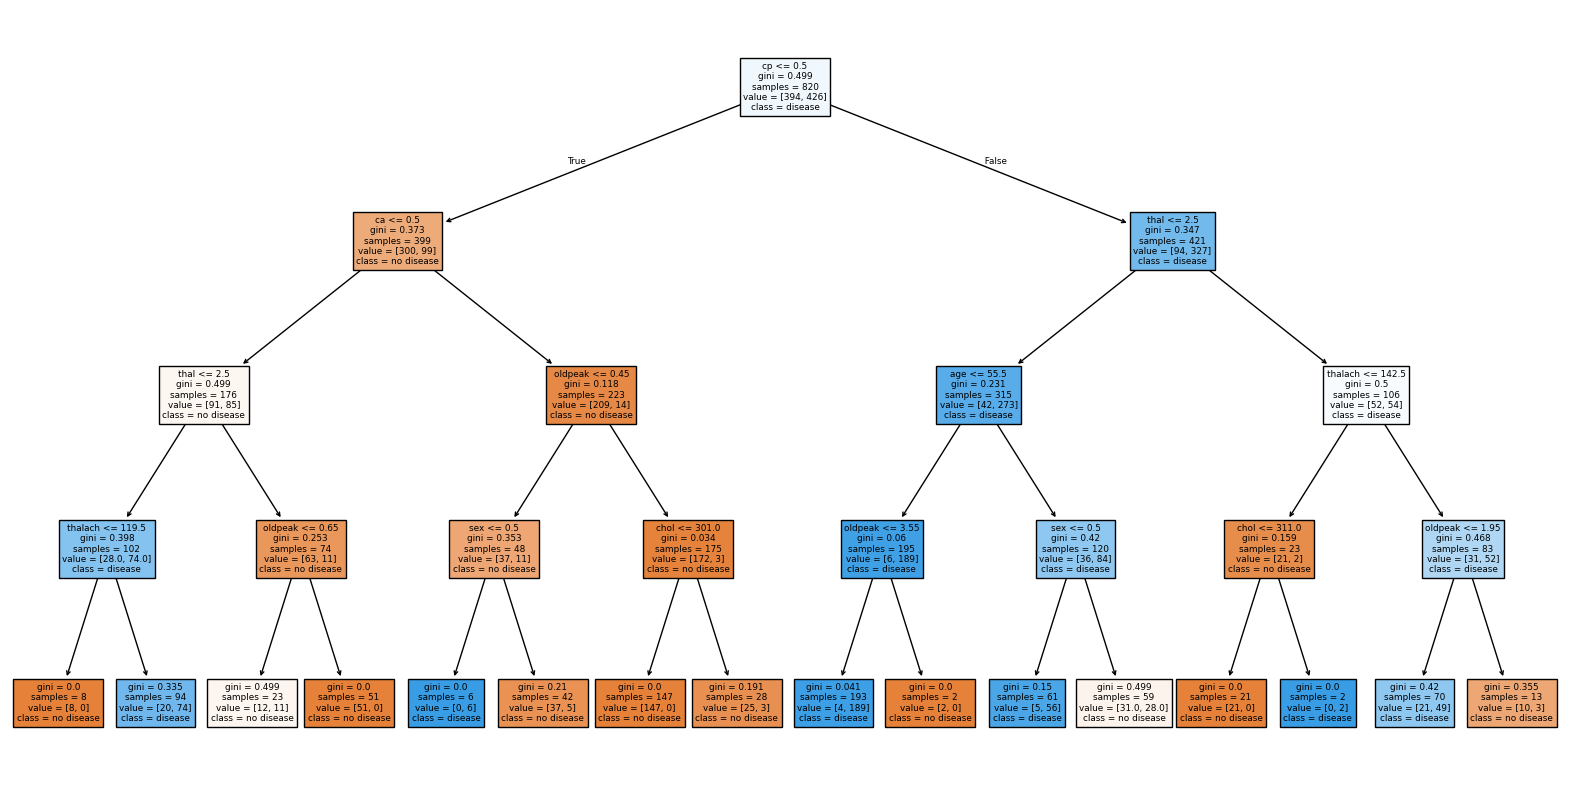

In [49]:
plt.figure(figsize=(20,10))
plot_tree(dt_clf,feature_names=X.columns,class_names=['no disease','disease'],filled=True)
plt.show()

## random forest classifier

In [193]:
rf=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=4)

In [195]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [197]:
y_pred_rf=rf.predict(X_test)

random forest accuracy
 0.8975609756097561
random forest classification report
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       105
           1       0.86      0.94      0.90       100

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205

random forest confusion matrix
 [[90 15]
 [ 6 94]]


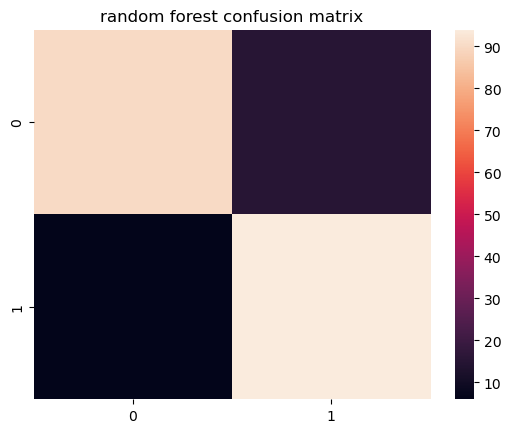

In [199]:
print('random forest accuracy\n', accuracy_score(y_test,y_pred_rf))
print('random forest classification report\n',classification_report(y_test,y_pred_rf))
print('random forest confusion matrix\n',confusion_matrix(y_test,y_pred_rf) )
sns.heatmap(confusion_matrix(y_test,y_pred_rf))
plt.title('random forest confusion matrix')
plt.show()

In [205]:
# feature importances
importances=pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
print('feature importances \n',importances)

feature importances 
 cp          0.205968
thal        0.154140
ca          0.135283
oldpeak     0.130040
thalach     0.105119
exang       0.071224
slope       0.051238
age         0.047249
sex         0.035823
trestbps    0.025506
chol        0.023816
restecg     0.009872
fbs         0.004722
dtype: float64


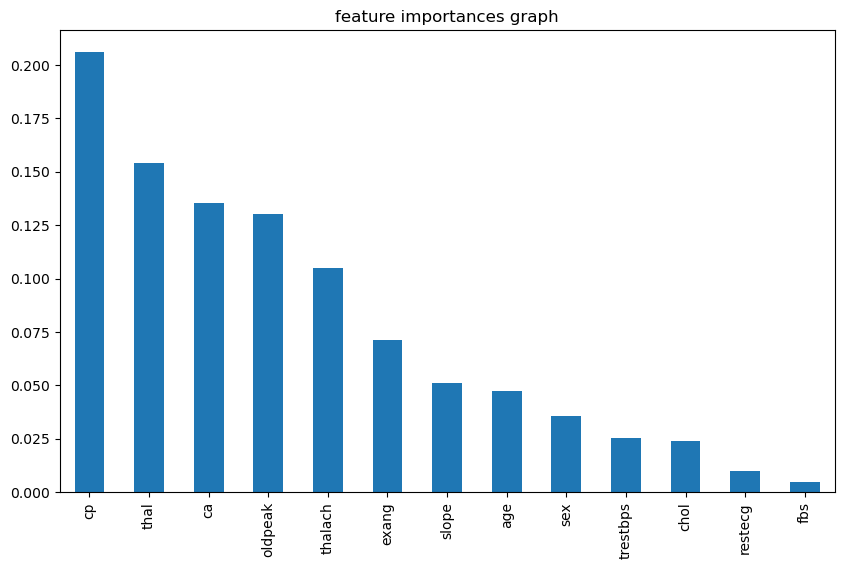

In [209]:
#plot feature importances
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title('feature importances graph')
plt.show()

In [217]:
# cross validation
dt_cv=cross_val_score(dt_clf,X,y,cv=5)
rf_cv=cross_val_score(rf,X,y,cv=5)


In [227]:
print('cross validation score for dts is ',np.mean(dt_cv))
print('cross validation score for rf is ',np.mean(rf_cv))


cross validation score for dts is  0.8341463414634147
cross validation score for rf is  0.8946341463414635
